
<h6 align = "center">Done by : AJARRAY Amine @ <a href = "mailto: ajarray@insea.ac.ma">aajarray@insea.ac.ma</a></h3>
<h6 align = "center">January 2022</h3></li>

# INTRODUCTION : 

Just having a good degree is no longer enough to secure that all-important graduate job offer in today’s world. Pertinent work experience is now just as valuable as degree and exam results when it comes to building a successful career. As a result, internships have become an essential way to help candidates make themselves stand out. The importance of an internship has been shown in several recent surveys.<br />
By partaking in an internship, I will be able to gain real-life exposure, grow my knowledge and determine if I'am in the right career field. Internships not only provide me with the first-hand experience in the real working world but also enable me to understand the career trajectory for my desired job title. <br/>
This paper work contains practical interview to an internship at FinaMaze. It contains three parts which will gradually lead to solve a financial problem using python. 
<ul>
    <li> <strong>STEP I</strong>: DATA PROCESSING.</li>
    <li> <strong>STEP II</strong>: DATA WRANGLING AND VISUALIZATION.</li>
    <li> <strong>STEP III</strong>: GET TO KNOW DATA.</li>
    <li> <strong>STEP IV</strong>: INVESTOR STRATEGIES SIMULATIONS.</li>
    <li> <strong>STEP VI</strong>: NUMERICAL TECHNIQUES AND ALGORITHMS.</li>
</ul>   

# IMPORTING LIBRARIES

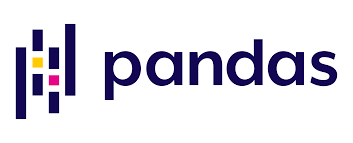
Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.

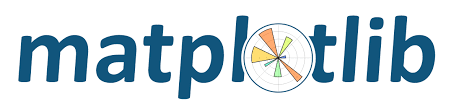
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

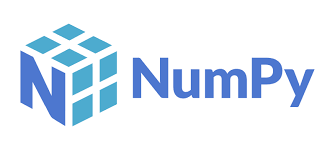
NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

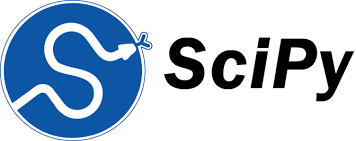
SciPy is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import cm
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
sns.set()

In [5]:
import os
os.chdir('C:\\Users\\DELL\\Desktop\\stage\\FinaMaze_Intern\\stocks_analysis')

# STEP I: DATA PROCESSING

In [6]:
import pandas as pd
def extract_data(data, stock, whole_data, start_date=None, end_date=None):
    dic={}
    stock=stock
    n=len(jsondata[stock])
    dates=[]
    close_prices=[]
    dic={}
    for i in range(n):
        dates.append(jsondata[stock][i]['Date'])
        close_prices.append(jsondata[stock][i]['Close'])

    dic['date']=dates
    dic['close'+'_'+stock]=close_prices
    dataframe=pd.DataFrame.from_dict(dic)
    dataframe['date'] = pd.to_datetime(dataframe['date'], format="%Y-%m-%d")
    dataframe=dataframe.sort_values('date')
    if whole_data:
        return dataframe.set_index('date')
    else:
        mask = (dataframe['date'] >= start_date) & (dataframe['date'] <= end_date)
        dataframe=dataframe.loc[mask]
        return dataframe.set_index('date')

In [7]:
import json
with open("data_market.json") as jsonFile:
    jsondata = json.load(jsonFile)
    jsonFile.close()

In [8]:
import random
def concatenated_data(stocks,start_date,end_date):
    df1=extract_data(jsondata,stocks[0],False,start_date,end_date)
    df2=extract_data(jsondata,stocks[1],False,start_date,end_date)
    df3=extract_data(jsondata,stocks[2],False,start_date,end_date)
    result = pd.merge(df1,df2,on='date',how='outer')
    df = pd.merge(result,df3,on='date',how='outer')
    df = df.sort_values(by=['date'])
    return df

In [9]:
random.seed(8)
l=list(jsondata.keys())
stocks=random.sample(l,3)
dataset=concatenated_data(stocks,'2017-01-01','2021-12-31')
stocks

['GOOG', 'AMZN', 'TSLA']

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   close_GOOG  1162 non-null   float64
 1   close_AMZN  1158 non-null   float64
 2   close_TSLA  1172 non-null   float64
dtypes: float64(3)
memory usage: 39.3 KB


We stocked our data in DataFrame format because it's a flexibile and flat format and many Machine Learning and Time Series models in general require flat data structure(If we want to predict stocks prices). Also This fromat will allow us to calculate portfolio metrics easly.

# STEP II: DATA WRANGLING AND VISUALIZATION

## II-1: Missing data

We can’t  change the missing values with global mean or medien because the time series data might have some like seasonality or trend and it can cause bias to the data. Estimation or imputation of the missing data with the values produced by some procedures or algorithms can be the best possible solution to minimize the bias effect of the conventional method of the data. So that at last, the data will be completed and ready to use for another step of analysis or data mining. We will choose to estimate a missing day stock value by Forward-fill Missing Values (Using value of next row to fill the missing value).

In [11]:
def compute_missing_data(data):
    final_data = data.ffill()
    return final_data


In [12]:
final_data = compute_missing_data(dataset)

In [13]:
final_data.head(10)

,close_GOOG,close_AMZN,close_TSLA
date,,,
2017-01-03,786.140015,753.669983,43.397999
2017-01-04,786.900024,757.179993,45.397999
2017-01-05,794.020020,780.450012,45.349998
2017-01-06,806.150024,795.989990,45.801998
2017-01-09,806.650024,796.919983,46.256001
2017-01-11,807.909973,799.020020,45.945999
2017-01-12,806.359985,813.640015,45.917999
2017-01-13,807.880005,817.140015,47.549999
2017-01-17,804.609985,809.719971,47.116001


In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   close_GOOG  1258 non-null   float64
 1   close_AMZN  1258 non-null   float64
 2   close_TSLA  1258 non-null   float64
dtypes: float64(3)
memory usage: 39.3 KB


In [15]:
final_data.describe()

,close_GOOG,close_AMZN,close_TSLA
count,1258.000000,1258.000000,1258.000000
mean,1443.840098,2087.200380,250.692616
std,594.799696,877.435378,298.428367
min,786.140015,753.669983,35.793999
25%,1056.649994,1501.992493,59.854001
50%,1197.260010,1829.619995,69.537998
75%,1568.387481,3116.869996,421.145012
max,3014.179932,3731.409912,1229.910034


In [17]:
stocks[0]

'GOOG'

## II-2 Data viz

In [21]:
def rainbow(categories):
    """
    This function generates a dictionary of color codes for each category.
    """
    c_scale = cm.rainbow(np.linspace(0,1,len(categories)))
    c_dict = {}

    for i,c in zip(categories,c_scale):
        c_dict[i] = c
        
    return c_dict

In [22]:
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

In [31]:
def plot_stocks(data,stocks):
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15,10))

    L=[0,1,2]
    # Subplot #1
    color = rainbow(L)
    for i in L: ax1.plot (data['close_'+stocks[i]], c = color[i], label = stocks[i], linewidth=1)




    # Formatting
    ax1.set_title ("stocks evolution")
    ax1.set_ylabel ("price")
    ax1.legend(title = "stock", loc = "upper right")

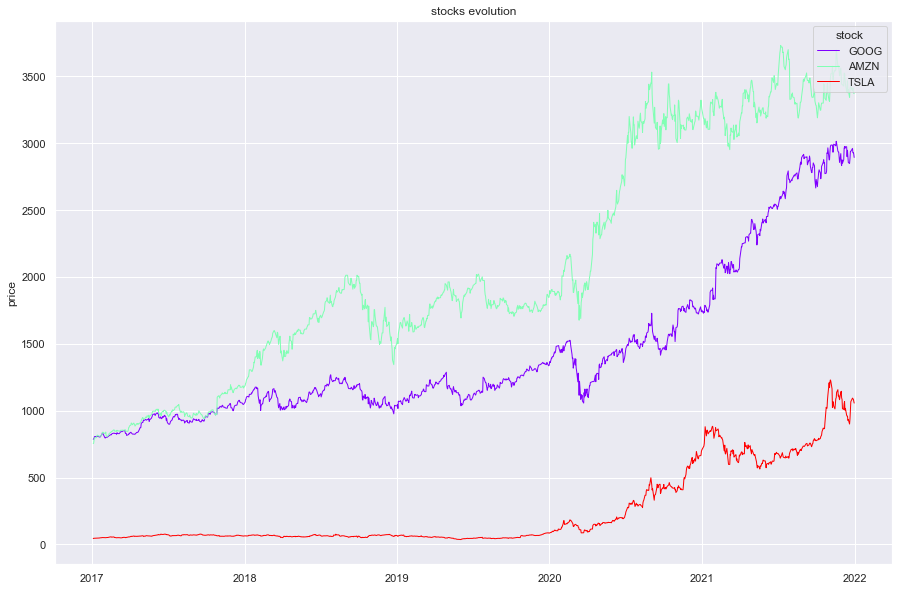

In [32]:
plot_stocks(final_data,stocks)

 we suppose that we invest 100$ in each of these  three stocks at 2017-01-01 , so let's see how much it worth at 2021-12-31 

In [43]:
def investement_return(amount,data,stocks):
    _return=round((amount/data.loc['2017-01-03']['close_'+stocks[0]])*data.loc['2021-12-31']['close_'+stocks[0]]+
      (amount/data.loc['2017-01-03']['close_'+stocks[1]])*data.loc['2021-12-31']['close_'+stocks[1]]+
      (amount/data.loc['2017-01-03']['close_'+stocks[2]])*data.loc['2021-12-31']['close_'+stocks[2]],2)
    return _return

In [44]:

amount=100
print('At the end of this period of investement, {}$ will worth:{}$ '.format(3*amount,investement_return(amount,final_data,stocks)))


At the end of this period of investement, 300$ will worth:3250.69$ 


In [45]:
cd

C:\Users\DELL


# STEP III: GET TO KNOW DATA

### weekly value of stocks 

In [46]:
def weekly_value(data,stocks,amount):
    agg_dict1 = {'close_'+stocks[0]: 'first','close_'+stocks[1]: 'first', 'close_'+stocks[2]: 'first'}
    agg_dict2 = {'close_'+stocks[0]: 'last','close_'+stocks[1]: 'last','close_'+stocks[2]: 'last' }
    df_1 = data.resample('W').agg(agg_dict1)
    df_2 = data.resample('W').agg(agg_dict2)
    df_3=((df_2.subtract(df_1)).div(df_1))*amount
    return df_3

# resampled dataframe
# 'W' means weekly aggregation


    


In [47]:

df=weekly_value(final_data,stocks,amount)


In [48]:
df.head()

,close_GOOG,close_AMZN,close_TSLA
date,,,
2017-01-08,2.545349,5.615191,5.539424
2017-01-15,0.152480,2.537273,2.797471
2017-01-22,0.050961,-0.171659,3.884027
2017-01-29,0.488216,2.187364,1.618994
2017-02-05,-0.103452,-2.430212,0.279296


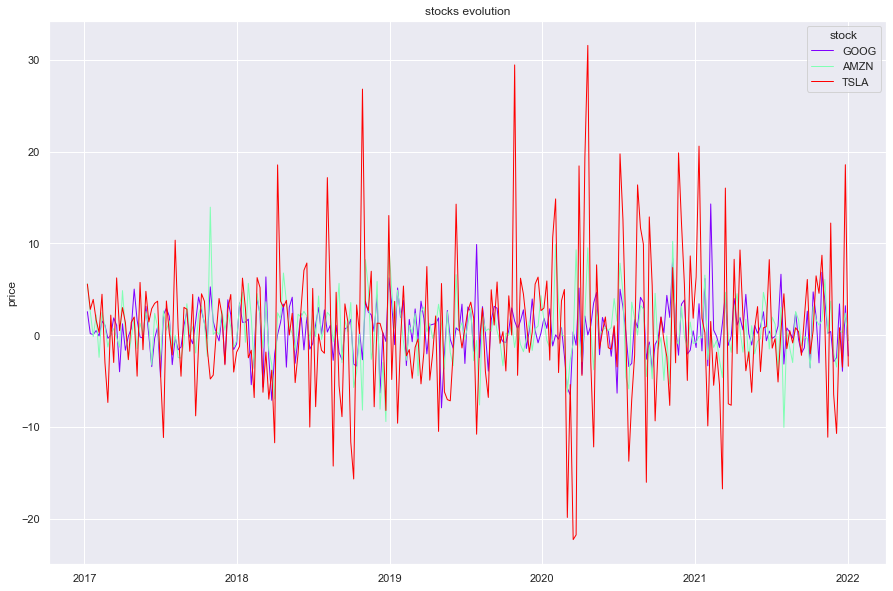

In [49]:
plot_stocks(df,stocks)

## daily return

In [50]:
def daily_return(data,stocks):
    first_stock=((data['close_'+stocks[0]]/data['close_'+stocks[0]].shift(1))-1)
    second_stock=((data['close_'+stocks[1]]/data['close_'+stocks[1]].shift(1))-1)
    third_stock=((data['close_'+stocks[2]]/data['close_'+stocks[2]].shift(1))-1)
    frame={stocks[0]:first_stock,stocks[1]:second_stock,stocks[2]:third_stock}
    return pd.DataFrame(frame).fillna(0)


In [51]:
data_2021=compute_missing_data(concatenated_data(stocks,'2021-01-01','2021-12-31'))

,close_GOOG,close_AMZN,close_TSLA
date,,,
2021-12-27,2961.280029,3393.389893,1093.939941
2021-12-28,2928.959961,3413.219971,1088.469971
2021-12-29,2930.090088,3384.020020,1086.189941
2021-12-30,2920.050049,3372.889893,1070.339966
2021-12-31,2893.590088,3372.889893,1056.780029


In [52]:
returns=daily_return(data_2021,stocks)
returns.head()

,GOOG,AMZN,TSLA
date,,,
2021-01-04,0.000000,0.000000,0.000000
2021-01-05,0.007337,0.000000,0.007317
2021-01-06,-0.003234,-0.015141,0.028390
2021-01-07,0.029943,0.007577,0.079447
2021-01-08,0.000000,0.006496,0.078403


In [53]:
final_data.head()

,close_GOOG,close_AMZN,close_TSLA
date,,,
2017-01-03,786.140015,753.669983,43.397999
2017-01-04,786.900024,757.179993,45.397999
2017-01-05,794.020020,780.450012,45.349998
2017-01-06,806.150024,795.989990,45.801998
2017-01-09,806.650024,796.919983,46.256001


In [58]:
returns

,GOOG,AMZN,TSLA
date,,,
2021-01-04,0.000000,0.000000,0.000000
2021-01-05,0.007337,0.000000,0.007317
2021-01-06,-0.003234,-0.015141,0.028390
2021-01-07,0.029943,0.007577,0.079447
2021-01-08,0.000000,0.006496,0.078403
...,...,...,...
2021-12-27,0.007588,-0.008178,0.025248
2021-12-28,-0.010914,0.005844,-0.005000
2021-12-29,0.000386,-0.008555,-0.002095


lets plot their histogram to check the normality

In [59]:
def plot_hist(data,stocks):
    returns=daily_return(data,stocks)
    plt.figure(figsize=(16,5))
    returns.hist(column=[stocks[0],stocks[1],stocks[2]])
    
    

<Figure size 1152x360 with 0 Axes>

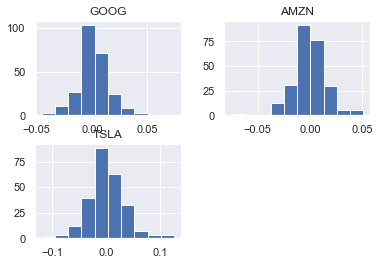

In [60]:
plot_hist(data_2021,stocks)

Checking normality using Shapiro-Wilk Test

H0:The sample comes from a normal distribution.

H0:The sample is not coming from normal distribution.


In [438]:
from scipy.stats import shapiro
# normality test
def normality_test(data,stocks):
    returns=daily_return(data,stocks)
    for column in returns.columns:
        print(column)
        stat, p_value = shapiro(returns[column])
        print('Statistics=%.3f, p_value=%.3f' % (stat, p_value))
# interpret
        alpha = 0.05
        if p_value > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')

In [439]:
normality_test(final_data,stocks)

GOOG
Statistics=0.908, p_value=0.000
Sample does not look Gaussian (reject H0)
AMZN
Statistics=0.924, p_value=0.000
Sample does not look Gaussian (reject H0)
TSLA
Statistics=0.911, p_value=0.000
Sample does not look Gaussian (reject H0)


### Monthly metrics computation for 2021

In [623]:
data_2021=compute_missing_data(concatenated_data(stocks,'2021-01-01','2021-12-31'))
data_2021.head()

,close_GOOG,close_AMZN,close_TSLA
date,,,
2021-01-04,1728.239990,3186.629883,729.770020
2021-01-05,1740.920044,3186.629883,735.109985
2021-01-06,1735.290039,3138.379883,755.979980
2021-01-07,1787.250000,3162.159912,816.039978
2021-01-08,1787.250000,3182.699951,880.020020


#### Returns

In [440]:
def monthly_return(data,stocks):
    first_stock = data['close_'+stocks[0]].resample('M').ffill().pct_change()
    second_stock = data['close_'+stocks[1]].resample('M').ffill().pct_change()
    third_stock = data['close_'+stocks[2]].resample('M').ffill().pct_change()
    frame={stocks[0]:first_stock,stocks[1]:second_stock,stocks[2]:third_stock}
    return pd.DataFrame(frame).fillna(0)
   



In [442]:
month_returns=monthly_return(data_2021,stocks)
month_returns.head()

,GOOG,AMZN,TSLA
date,,,
2021-01-31,0.000000,0.000000,0.000000
2021-02-28,0.109558,-0.035328,-0.148740
2021-03-31,0.015597,0.000372,-0.011207
2021-04-30,0.174637,0.120663,0.062147
2021-05-31,-0.007543,-0.070470,-0.118713


volatility = std(sum(return)) * sqrt(trading days)

In [486]:
def annualized_volatility(data,stocks):
    returns=daily_return(data,stocks)
    for column in returns.columns:
        print(column+ ' annualized Volatility:')
        returns[column]
        volatility = np.std(returns[column])*np.sqrt(252)
        print(volatility)

In [487]:
annualized_volatility(data_2021,stocks)

GOOG annualized Volatility:
0.23784233251471731
AMZN annualized Volatility:
0.2413410523407816
TSLA annualized Volatility:
0.5289822239913697


The Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility 

In [413]:

def annualized_sharp_ratio(data,stocks,TRADING_DAYS):
    for dataframe in daily_return(data,stocks):
        print(dataframe.name[6:] + ' sharp ratio:')
        sharpe_ratio = (np.mean(dataframe)/np.std(dataframe))*np.sqrt(TRADING_DAYS)
        print(sharpe_ratio)

In [414]:
annualized_sharp_ratio(data_2021,stocks,252)

GOOG sharp ratio:
2.2872846933259066
AMZN sharp ratio:
0.35635515859060574
TSLA sharp ratio:
0.9631113144658817


# STEPIV: INVESTOR STRATEGIES SIMULATIONS

In this Part wi will look at the concepts of portfolio management. Wi will use the Modern Portfolio Theory(MPT).

Our goal is to choose the weights for each asset in our portfolio such that we maximize the expected return given a level of risk .

Mathematically, we can model this probleme   as shown below:

>maximize E[(weights)'.returns]
    
>subj to  portfolio_variance= \begin{equation} \sigma^2 \end{equation}
    

In [ ]:
returns=

In [654]:
def portfolio_return(data,stocks,weights):
    returns=daily_return(data,stocks)
    portfolio_return=returns.dot(weights)
    return portfolio_return.mean()
    

In [657]:
def portfolio_volatility(data,stocks,weights):
    returns=daily_return(data,stocks)
    variance_matrix=returns.cov()*252
    portfolio_variance=np.transpose(weights)@variance_matrix@weights
    portfolio_volatility=np.sqrt(portfolio_variance)
    return portfolio_volatility
    

In [658]:
portfolio_volatility(data_2021,stocks,weights)

0.2577281814963313

The task for us now is to optimize the weights. ie find the Portfolio with minimum Volatility (Risk).

In [596]:
def opimized_portfolio(data,stocks,number_portfolio):
    num_stocks=len(stocks)
    portfolio_weights=[]
    port_ret=[]
    portfol_volatility=[]
    for i in range(number_portfolio):
        weights=np.random.random(num_stocks)
        weights=weights/np.sum(weights)
        portfolio_weights.append(weights)
        port_ret+=[portfolio_return(data,stocks,portfolio_weights[i])]
        portfol_volatility+=[portfolio_volatility(data,stocks,portfolio_weights[i])]
    dic={'return':port_ret,'volatility':portfol_volatility}
    for x,stock in enumerate(data.columns.tolist()):
        dic[stock[6:]+'_wieght']=[w[x] for w in portfolio_weights]
    df=pd.DataFrame(dic)
    min_volatility=df.iloc[df['volatility'].idxmin()]
    return min_volatility

    
        
        

In [602]:
best_invest=opimized_portfolio(data_2021,stocks,100)
best_invest

return         0.001306
volatility     0.211061
GOOG_wieght    0.478185
AMZN_wieght    0.465192
TSLA_wieght    0.056624
Name: 36, dtype: float64

In [603]:
best_invest[2]

0.4781847291593612

In [610]:
def investement_decision(data,stocks):
    best_invest=opimized_portfolio(data,stocks,100)
    print("for Brayen the best investement hi can make to minimize his risk is as folow:invest {}$ in {}, {}$ in {}, and {}$ in {}".format(round(1000*best_invest[2],2),stocks[0],round(1000*best_invest[3],2),stocks[1],round(1000*best_invest[4],2),stocks[2]))

In [611]:
investement_decision(data_2021,stocks)

for Brayen the best investement hi can make to minimize his risk is as folow:invest 479.42$ in GOOG, 482.72$ in AMZN, and 37.86$ in TSLA


## comparaison between previos aproach and Naïve uniform investment strategy 

In [614]:
print("Volatility for Naïve uniform investment strategyis:{} ".format(portfolio_volatility(data_2021,stocks,[1/3,1/3,1/3])))

Volatility for Naïve uniform investment strategyis:0.2572381813557438 


The volatility of Naïve uniform investment strategyis is high then the volatility of the previous portfolio, so this allocation  is more efficient

## Beta of Those Two strategies

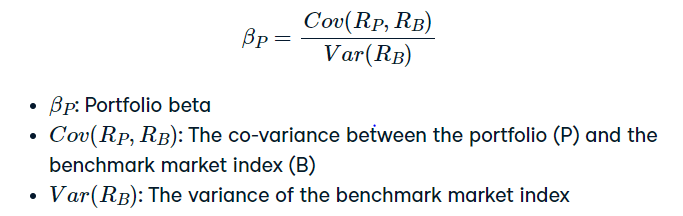

In [621]:
stocks

['GOOG', 'AMZN', 'TSLA']

In [629]:
stocks1=['GOOG', 'TSLA','NDX']
stocks2=['GOOG', 'AMZN','NDX']
data1=compute_missing_data(concatenated_data(stocks1,'2021-01-01','2021-12-31'))
data2=compute_missing_data(concatenated_data(stocks2,'2021-01-01','2021-12-31'))

In [632]:
data1.head()

,close_GOOG,close_TSLA,close_NDX
date,,,
2021-01-04,1728.239990,729.770020,12694.660156
2021-01-05,1740.920044,735.109985,12802.379883
2021-01-06,1735.290039,755.979980,12802.379883
2021-01-07,1787.250000,816.039978,12939.570313
2021-01-08,1787.250000,880.020020,12939.570313


In [638]:
def beta(data,stock,benchmark):
    cov = data.cov()
    var = data[benchmark].var()
    beta=cov.loc[stock, benchmark]/var
    return beta

In [644]:
beta_google=beta(data1,'close_GOOG','close_NDX')
beta_TESLA=beta(data1,'close_TSLA','close_NDX')
beta_amazon=beta(data2,'close_AMZN','close_NDX')

In [646]:
google_amount_invested=round(1000*best_invest[2],2)
amazon_amount_invested=round(1000*best_invest[3],2)
tesla_amount_invested=round(1000*best_invest[4],2)
print('Beta of the first strategy={}'.format((google_amount_invested/1000)*beta_google + (amazon_amount_invested/1000)*beta_amazon + (tesla_amount_invested/1000)*beta_TESLA ))
print('Beta of the second strategy={}'.format((1/3)*beta_google + (1/3)*beta_amazon + (1/3)*beta_TESLA ))

Beta of the first strategy=0.1960101346150401
Beta of the second strategy=0.1648196213829846
